In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import math

from time import time

from Learning.Model_Utils import load_Flare, load_nonFlare, split, split_List
from Learning import Resnet50_Standard

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
def local_convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [63]:
#Load Data with standard bg_sub applied
data_sub = pd.read_pickle('data_bg_subtract.pkl')
no_Flare_sub = r'C:\Users\Daniel\Downloads\SunPy\Non_Flare_sub'
files = [f for f in listdir(no_Flare_sub) if isfile(join(no_Flare_sub, f))]

In [64]:
data_sub

,date,obse,ving,state,start,end,class,sub,qual.,lower,upper,remarks
0,100102.0,801.0,1458.0,BLEN,085618,085812,III,G,1.0,180,416,subtracted_BG\III\BLEN7M_20100102_084502_25.fi...
1,100102.0,NaN,NaN,BLEN,085818,085924,III,G,1.0,46,78,subtracted_BG\III\BLENSW_20100102_084459_59.fi...
2,100102.0,NaN,NaN,BLEN,141518,141812,DCIM,C,3.0,648,870,subtracted_BG\DCIM\BLEN7M_20100102_141512_24.f...
3,100103.0,801.0,1459.0,BLEN,094542,094554,III,G,2.0,203,356,subtracted_BG\III\BLEN7M_20100103_094510_24.fi...
4,100103.0,NaN,NaN,BLEN,141042,141124,III,G,2.0,192,424,subtracted_BG\III\BLEN7M_20100103_140010_24.fi...
5,100105.0,800.0,1501.0,BLEN,09346,093430,III,B,1.0,180,408,subtracted_BG\III\BLEN7M_20100105_093009_24.fi...
6,100105.0,NaN,NaN,BLEN,093412,093430,III,B,1.0,27,80,subtracted_BG\III\BLENSW_20100105_092958_59.fi...
7,100111.0,758.0,1508.0,BLEN,141936,141954,III,B,1.0,20,80,subtracted_BG\III\BLENSW_20100111_141458_59.fi...
8,100113.0,757.0,1511.0,BLEN,13286,133118,III,G,1.0,192,456,subtracted_BG\III\BLEN7M_20100113_131506_24.fi...
9,100113.0,NaN,NaN,BLEN,133018,133054,III,G,1.0,37,62,subtracted_BG\III\BLENSW_20100113_133000_59.fi...


In [69]:
train_0, eval_0 = split(data_sub[0:10],0.7)
train_1, eval_1 = split_List(no_Flare_sub,0.7)

In [70]:
X_0, Y_0, = load_Flare(train_0, 96)
X_1, Y_1, = load_nonFlare(train_1, 96, X_0.shape[0])

X_train = np.expand_dims(np.concatenate((X_0,X_1)), axis=4)
Y_train = np.concatenate((Y_0,Y_1))

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [71]:
X_0, Y_0, = load_Flare(eval_0, 96)
X_1, Y_1, = load_nonFlare(eval_1, 96, X_0.shape[0])

X_eval = np.expand_dims(np.concatenate((X_0,X_1)), axis=4)
Y_eval = np.concatenate((Y_0,Y_1))

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [72]:
X_train = X_train/255.
X_eval = X_eval/255.

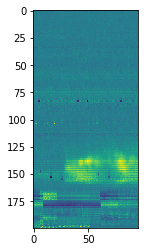

In [73]:
plt.imshow(X_0[0])

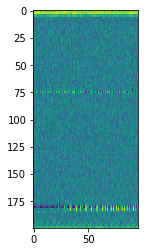

In [74]:
plt.imshow(X_1[0])

In [75]:
X_train.shape, Y_train.shape

((125, 200, 96, 1), (125,))

In [76]:
X_eval.shape, Y_eval.shape

((80, 200, 96, 1), (80,))

In [77]:
#converting to one hot
Y_train = local_convert_to_one_hot(Y_train.astype('int32'), 2)
Y_eval = local_convert_to_one_hot(Y_eval.astype('int32'), 2)

In [81]:
tests = np.concatenate(
    (
    np.expand_dims(np.expand_dims(X_0[0], axis=3), axis=0),
    np.expand_dims(np.expand_dims(X_0[1], axis=3), axis=0),
    np.expand_dims(np.expand_dims(X_0[2], axis=3), axis=0)
    )
)

labels = np.concatenate(
    (
    np.expand_dims(Y_0[0], axis=0),
    np.expand_dims(Y_0[1], axis=0),
    np.expand_dims(Y_0[2], axis=0)
    )
)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


In [84]:
model = Resnet50_Standard.Resnet50(classes=2)

In [85]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [54]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
FTR = model.fit(X_train, Y_train, batch_size=32, epochs=30)

preds = model.evaluate(X_eval, Y_eval)
print("Loss " + str(preds[0]))
print("Accuracy " + str(preds[1]))

predictions = model.predict(tests)
here = tf.argmax(input=predictions, axis=1)
print('Predicted :' + str(sess.run(here)))
print('Original Label : ' + str(labels))

Epoch 1/30


FailedPreconditionError: Error while reading resource variable training_2/TFOptimizer/beta2_power from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/training_2/TFOptimizer/beta2_power/class tensorflow::Var does not exist.
	 [[{{node training_2/TFOptimizer/Adam/update_private__identity_block_23/res5c_branch2c/kernel/ResourceApplyAdam/ReadVariableOp_1}}]]
	 [[{{node loss_1/output_1_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/ExpandDims_1}}]]

In [76]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    FTR = model.fit(X_train, Y_train, batch_size=32, epochs=1)
    
    preds = model.evaluate(X_eval, Y_eval)
    print("Loss " + str(preds[0]))
    print("Accuracy " + str(preds[1]))
    
    predictions = model.predict(tests)
    here = tf.argmax(input=predictions, axis=1)
    print('Predicted :' + str(sess.run(here)))
    print('Original Label : ' + str(labels))
    
    saver = tf.train.Saver() 
    saver.save(sess, 'test_overfitting_session.chkp')

    #Watch out while overwriting the weights
    #model.save_weights('Long_tr

5662/5662 [==============================] - ETA: 0s - loss: 2.1808 - acc: 0.5007   - ETA: 6s - loss: 2. - ETA: 2s - loss: 2.3394  - 36s 6ms/sample - loss: 2.1693 - acc: 0.5034
Loss 2.169313488603138
Accuracy 0.5033557
Predicted :[1 0 1]
Original Label : ['1' '1' '1']


In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    FTR = model.fit(X_train, Y_train, batch_size=32, epochs=5)
    
    preds = model.evaluate(X_eval, Y_eval)
    print("Loss " + str(preds[0]))
    print("Accuracy " + str(preds[1]))
    
    predictions = model.predict(tests)
    here = tf.argmax(input=predictions, axis=1)
    print('Predicted :' + str(sess.run(here)))
    print('Original Label : ' + str(labels))
    
    #Watch out while overwriting the weights
    model.save_weights('Long_data_OverFitt2Longer.hdf5', overwrite=True)
    sess.close()

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
137817/137817 [==============================] - 3092s 22ms/sample - loss: 0.0206 - acc: 0.9955
Epoch 2/5
137817/137817 [==============================] - 3049s 22ms/sample - loss: 0.0104 - acc: 0.9979
Epoch 3/5
137817/137817 [==============================] - 3071s 22ms/sample - loss: 0.0075 - acc: 0.9984
Epoch 4/5
137817/137817 [==============================] - 3053s 22ms/sample - loss: 0.0062 - acc: 0.9984
Epoch 5/5
60719/60719 [==============================] - 369s 6ms/sample - loss: 0.0107 - acc: 0.9955
Loss 0.010719204939432755
Accuracy 0.9955039
Predicted :[1 1 1]
Original Label : ['1' '1' '1']


In [86]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    FTR = model.fit(X_train, Y_train, batch_size=32, epochs=150)
    
    preds = model.evaluate(X_eval, Y_eval)
    print("Loss " + str(preds[0]))
    print("Accuracy " + str(preds[1]))
    
    predictions = model.predict(tests)
    here = tf.argmax(input=predictions, axis=1)
    print('Predicted :' + str(sess.run(here)))
    print('Original Label : ' + str(labels))
    
    #Watch out while overwriting the weights
    model.save_weights('small_data_OverFitt2Longer.hdf5', overwrite=True)
    sess.close()

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000001758AC26668>>
Traceback (most recent call last):
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


Epoch 1/150
125/125 [==============================] - 7s 58ms/sample - loss: 0.4092 - acc: 0.8160
Epoch 2/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.1969 - acc: 0.9520
Epoch 3/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.1100 - acc: 0.9840
Epoch 4/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.1117 - acc: 0.9520
Epoch 5/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.0624 - acc: 0.9920
Epoch 6/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.0092 - acc: 1.0000
Epoch 7/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.0094 - acc: 0.9920
Epoch 8/150
125/125 [==============================] - 3s 24ms/sample - loss: 0.0011 - acc: 1.0000
Epoch 9/150
125/125 [==============================] - 3s 24ms/sample - loss: 1.7368e-04 - acc: 1.0000
Epoch 10/150
125/125 [==============================] - 3s 24ms/sample - loss: 2.3892e-04 - acc: 1.0000
E

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    model.load_weights('Long_data_OverFitt2Longer.hdf5')

# Predictions Game

In [88]:
model.load_weights('small_data_OverFitt2Longer.hdf5')

In [89]:
predictions = model.predict(X_eval)

In [90]:
predictions[1]

array([1.0000000e+00, 1.3581772e-10], dtype=float32)

In [91]:
np.argmax(predictions[1])

0

In [92]:
eval_labels = np.concatenate((Y_0,Y_1))

In [93]:
pred_max = list(map(lambda x: np.argmax(x), predictions))

In [94]:
print(pred_max[0:100])
print(eval_labels[0:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']


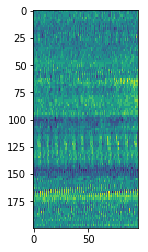

In [95]:
plt.imshow(X_0[1])

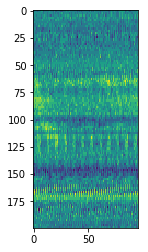

In [96]:
plt.imshow(X_0[2])

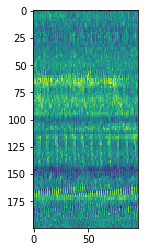

In [99]:
plt.imshow(X_0[3])

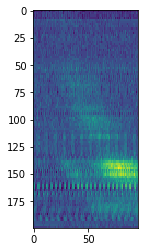

In [100]:
plt.imshow(X_0[4])

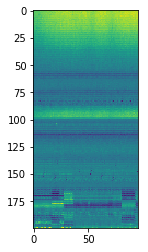

In [48]:
plt.imshow(X_0[16])

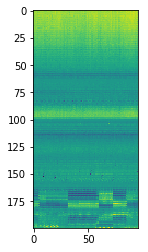

In [50]:
plt.imshow(X_0[19])

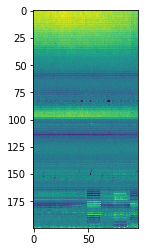

In [51]:
plt.imshow(X_0[18])

In [23]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'test_overfitting_session.chkp')
predictions = model.predict(X_eval)
sess.run(predictions)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from test_overfitting_session.chkp


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000020E07C950F0>>
Traceback (most recent call last):
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


FailedPreconditionError: Error while reading resource variable private__conv_block_1/res3a_branch2c/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/private__conv_block_1/res3a_branch2c/bias/class tensorflow::Var does not exist.
	 [[{{node private__conv_block_1/res3a_branch2c/BiasAdd/ReadVariableOp}}]]
	 [[{{node dense_Outputs/Softmax}}]]

# Evaluating model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    preds = model.evaluate(X_eval, Y_eval)
    print("Loss " + str(preds[0]))
    print("Accuracy " + str(preds[1]))


# Predictions

In [ ]:
tests = np.concatenate(
    (
    np.expand_dims(np.expand_dims(X_0[0], axis=3), axis=0),
    np.expand_dims(np.expand_dims(X_0[1], axis=3), axis=0),
    np.expand_dims(np.expand_dims(X_0[2], axis=3), axis=0)
    )
)

labels = np.concatenate(
    (
    np.expand_dims(Y_0[0], axis=0),
    np.expand_dims(Y_0[1], axis=0),
    np.expand_dims(Y_0[2], axis=0)
    )
)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    predictions = model.predict(tests)
    here = tf.argmax(input=predictions, axis=1)
    
    print('Predicted :' + str(sess.run(here)))
    print('Original Label : ' + str(labels))

# Small batch experimentation

In [19]:
from resnets_utils import load_dataset, convert_to_one_hot
X_train_o, Y_train_o, X_test_o, Y_test_o, classes = load_dataset()

X_train = X_train_o/255.
X_test = X_test_o/255.

Y_train = convert_to_one_hot(Y_train_o, 6).T
Y_test = convert_to_one_hot(Y_test_o, 6).T


X_train = X_train_o/255.
X_test = X_test_o/255.

Y_train = convert_to_one_hot(Y_train_o, 6).T
Y_test = convert_to_one_hot(Y_test_o, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [20]:
model = Resnet50_Standard.Resnet50(classes=6)
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    FTR = model.fit(X_train, Y_train, batch_size=32, epochs=30)
    
    preds = model.evaluate(X_test, Y_test)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000001C211BA8C50>>
Traceback (most recent call last):
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


Epoch 1/30
1080/1080 [==============================] - 13s 12ms/sample - loss: 10.6338 - acc: 0.2750
Epoch 2/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 10.7511 - acc: 0.3315
Epoch 3/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 10.7649 - acc: 0.3296
Epoch 4/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 10.7936 - acc: 0.3231
Epoch 5/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 10.7732 - acc: 0.3287
Epoch 6/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 10.7840 - acc: 0.3259
Epoch 7/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 9.5111 - acc: 0.3407
Epoch 8/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 1.5041 - acc: 0.4250
Epoch 9/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 0.7413 - acc: 0.7028
Epoch 10/30
1080/1080 [==============================] - 10s 9ms/sample - loss: 0.5090 - acc: